In [16]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout

In [17]:
data=pd.read_csv("C:\\Users\\laksh\\Downloads\\dataset.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2018-02-05,262.000000,267.899994,250.029999,254.259995,254.259995,11896100
1,2018-02-06,247.699997,266.700012,245.000000,265.720001,265.720001,12595800
2,2018-02-07,266.579987,272.450012,264.329987,264.559998,264.559998,8981500
3,2018-02-08,267.079987,267.619995,250.000000,250.100006,250.100006,9306700
4,2018-02-09,253.850006,255.800003,236.110001,249.470001,249.470001,16906900


In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [19]:
data["Close"]=pd.to_numeric(data.Close,errors='coerce')
data=data.dropna()
trainData=data.iloc[:,4:5].values

In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1009 entries, 0 to 1008
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1009 non-null   object 
 1   Open       1009 non-null   float64
 2   High       1009 non-null   float64
 3   Low        1009 non-null   float64
 4   Close      1009 non-null   float64
 5   Adj Close  1009 non-null   float64
 6   Volume     1009 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 55.3+ KB


In [21]:
sc=MinMaxScaler(feature_range=(0,1))
trainData=sc.fit_transform(trainData)
trainData.shape

(1009, 1)

In [22]:
x_train=[]
y_train=[]

for i in range(60,1009):
    x_train.append(trainData[i-60:i,0])
    y_train.append(trainData[i,0])

x_train,y_train=np.array(x_train),np.array(y_train)
    

In [23]:
#Adding the batch size axis
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1)) 
x_train.shape

(949, 60, 1)

In [24]:
model=Sequential()

model.add(LSTM(units=100,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=True))
model.add(Dropout(0.2))

model.add(LSTM(units=100,return_sequences=False))
model.add(Dropout(0.2))

model.add(Dense(units=1))
model.compile(optimizer='adam',loss="mean_squared_error")


C:\Users\laksh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\rnn\rnn.py:205: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [25]:
hist=model.fit(x_train,y_train,epochs=20,batch_size=32,verbose=2)

Epoch 1/20
30/30 - 7s - 222ms/step - loss: 0.0370
Epoch 2/20
30/30 - 2s - 74ms/step - loss: 0.0070
Epoch 3/20
30/30 - 2s - 69ms/step - loss: 0.0060
Epoch 4/20
30/30 - 2s - 75ms/step - loss: 0.0053
Epoch 5/20
30/30 - 2s - 75ms/step - loss: 0.0055
Epoch 6/20
30/30 - 2s - 64ms/step - loss: 0.0047
Epoch 7/20
30/30 - 2s - 69ms/step - loss: 0.0045
Epoch 8/20
30/30 - 2s - 67ms/step - loss: 0.0053
Epoch 9/20
30/30 - 2s - 62ms/step - loss: 0.0048
Epoch 10/20
30/30 - 2s - 64ms/step - loss: 0.0039
Epoch 11/20
30/30 - 2s - 63ms/step - loss: 0.0051
Epoch 12/20
30/30 - 2s - 72ms/step - loss: 0.0042
Epoch 13/20
30/30 - 2s - 72ms/step - loss: 0.0037
Epoch 14/20
30/30 - 2s - 70ms/step - loss: 0.0037
Epoch 15/20
30/30 - 2s - 71ms/step - loss: 0.0041
Epoch 16/20
30/30 - 2s - 66ms/step - loss: 0.0039
Epoch 17/20
30/30 - 2s - 65ms/step - loss: 0.0037
Epoch 18/20
30/30 - 2s - 66ms/step - loss: 0.0036
Epoch 19/20
30/30 - 2s - 68ms/step - loss: 0.0036
Epoch 20/20
30/30 - 3s - 88ms/step - loss: 0.0034


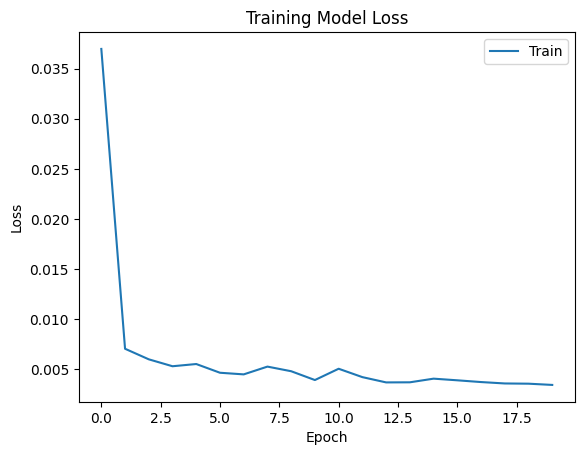

In [26]:
plt.plot(hist.history['loss'])
plt.title('Training Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train'],loc='upper right')
plt.show()

In [27]:
testData=pd.read_csv("C:\\Users\\laksh\\Downloads\\dataset.csv")
testData["Close"]=pd.to_numeric(testData.Close,errors='coerce')
testData=testData.dropna()
testData=testData.iloc[:,4:5]
y_test=testData.iloc[60:,0:].values

#input array for the model
inputClosing=testData.iloc[:,0:].values
inputClosing_scaled=sc.transform(inputClosing)
inputClosing_scaled.shape
x_test=[]
length=len(testData)
timestep=60
for i in range(timestep,length):
    x_test.append(inputClosing_scaled[i-timestep:i,0])
x_test=np.array(x_test)
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
x_test.shape

(949, 60, 1)

In [28]:
y_pred=model.predict(x_test)
y_pred

30/30 ━━━━━━━━━━━━━━━━━━━━ 1s 34ms/step


array([[0.18327248],
       [0.17760016],
       [0.17297442],
       [0.1699901 ],
       [0.16923825],
       [0.17087197],
       [0.17473184],
       [0.18024653],
       [0.1864659 ],
       [0.1925858 ],
       [0.1978867 ],
       [0.2020304 ],
       [0.20478798],
       [0.20609534],
       [0.2064982 ],
       [0.20656498],
       [0.20737569],
       [0.20984542],
       [0.2143386 ],
       [0.22049895],
       [0.22777534],
       [0.23535356],
       [0.24289711],
       [0.25022805],
       [0.25733525],
       [0.2641855 ],
       [0.2702738 ],
       [0.27507812],
       [0.27836344],
       [0.28029305],
       [0.2820692 ],
       [0.285352  ],
       [0.2909336 ],
       [0.2985682 ],
       [0.30823088],
       [0.32011294],
       [0.33369398],
       [0.34765208],
       [0.35900825],
       [0.3665499 ],
       [0.36970115],
       [0.36906952],
       [0.3655569 ],
       [0.36063415],
       [0.35517585],
       [0.35025132],
       [0.34716702],
       [0.347

In [29]:
predicted_price=sc.inverse_transform(y_pred)

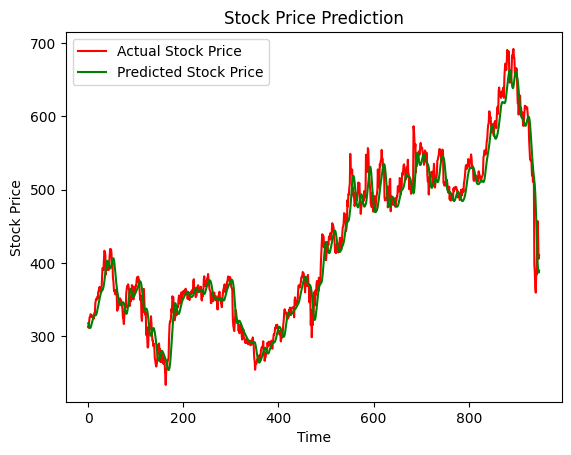

In [30]:
plt.plot(y_test,color='red',label='Actual Stock Price')
plt.plot(predicted_price,color='green',label='Predicted Stock Price')
plt.title('Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.show()